In [21]:
import sys
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns




In [16]:
# intialising
df = pd.read_csv("netflix_titles.csv")
df.rename(columns = {"listed_in":"genre"}, inplace = True)
display(df.head(3))



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


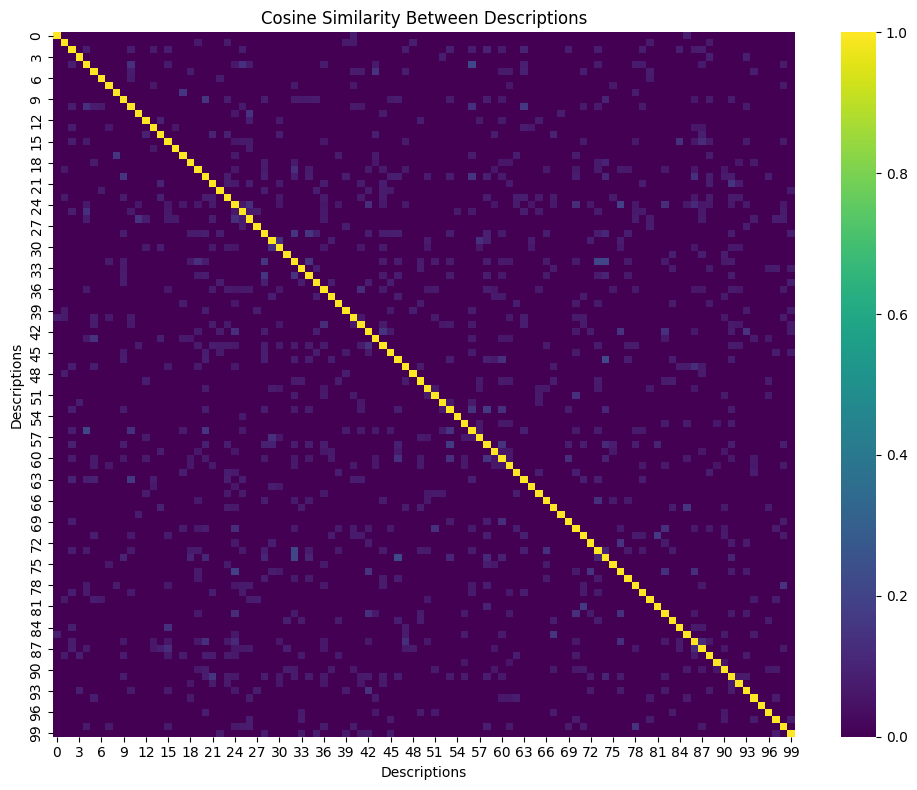

In [27]:
# Group content based on description similarity
# second attempt using a smaller sample as before only had the lead diagonal where the description was compared to itself 
ex1 = df.dropna(subset = "description").copy()
df_sample = ex1.sample(n=100, random_state=42)
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df_sample['description'])
similarityMatrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarityMatrix, cmap='viridis')
plt.title('Cosine Similarity Between Descriptions')
plt.xlabel('Descriptions')
plt.ylabel('Descriptions')
plt.tight_layout()
plt.show()



In [ ]:
# Build a recommendation system based on genre or cast similarity

# so how this will work, if you like a particualr actor it will suggest other shows/ movies featuring that actor
# if you like a genre it will produce a list that contain that genre plus other genres
# you choose if you are using genre or actor 


# choosing if selection is done based on genre or actor

choice = True
while choice:
    lookup = input("please enter a for genre b for actor").lower()
    if lookup in ("a","b"):
        choice = False

# if lookup == a then sorting by genre
if lookup == "a":
    ex3 =  df.dropna(subset ="genre").copy()
    userGenre = input("enter the genre you like").lower()
    ex3 = ex3[ex3["genre"].str.lower().str.contains(userGenre)]
    display(ex3)
else:
    ex3 =  df.dropna(subset ="cast").copy()
    userActor = input("enter the actor you like").lower()
    ex3 = ex3[ex3["genre"].str.lower().str.contains(userActor)]
    display(ex3)




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,NaN,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...
88,s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",NaN,"September 9, 2021",2021,PG-13,96 min,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Mal..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8756,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...


In [ ]:
#Predict genre or maturity level based on the description text
# Can then use the given ratings to work out how far off the prediction is on average / how many were correct

In [17]:
ex2 = df.dropna(subset = ["rating","description"]).copy()
display(ex2.head())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
# Split the code into training and testing 70% train 30% predicition?
# x is description and y is genre as rating as I am predicting rating from description
X = ex2["description"]
Y = ex2["rating"]
# train and then test when assinging variables 
# takes sample of X,Y looks at the rating , will then make predictions on the reserved 20%
X_train , X_test, Y_train , Y_test = train_test_split(X,Y, random_state = 25, test_size = 0.2)



In [31]:
# print(len(X_train), len(X_test))
# tokenise the description
vectorizer = CountVectorizer(stop_words = "english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [32]:
# initialising and training the model
model = MultinomialNB()
model.fit(X_train_vec, Y_train)



,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [33]:
#testing the model
Y_pred = model.predict(X_test_vec)
print(f"Accuracy  : {accuracy_score(Y_test, Y_pred)}")
print(classification_report(Y_test, Y_pred))

Accuracy  : 0.4020442930153322
              precision    recall  f1-score   support

      84 min       0.00      0.00      0.00         1
           G       0.00      0.00      0.00         6
       NC-17       0.00      0.00      0.00         1
          NR       0.00      0.00      0.00        21
          PG       0.00      0.00      0.00        53
       PG-13       1.00      0.01      0.02       116
           R       0.17      0.03      0.05       157
       TV-14       0.31      0.36      0.33       425
        TV-G       0.00      0.00      0.00        42
       TV-MA       0.43      0.76      0.55       645
       TV-PG       0.35      0.11      0.16       159
        TV-Y       0.63      0.43      0.51        56
       TV-Y7       0.70      0.30      0.42        77
    TV-Y7-FV       0.00      0.00      0.00         1
          UR       0.00      0.00      0.00         1

    accuracy                           0.40      1761
   macro avg       0.24      0.13      0.14      

C:\Users\tbarn\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tbarn\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tbarn\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [ ]:
# IDEAS FOR FUTRUE 
# Try a better model ie
#Try LogisticRegression, RandomForest, or XGBoost
# Use TF-IDF instead of CountVectorizer

In [ ]:
# Create visual networks showing collaborations among people